# 1) Introduction about dataset

The dataset tells about the sales prediction that how much of a product people will buy based on factors such as the amount we spend to advertise our product , the segment of people we advertise for , or the platform we are advertising on about our product.
So our aim is to predict the future sales based on advertising expenditure, features such as TV, Newspapers, and Radio.

# 2) Modules Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# 3) Basic info about dataset

In [4]:
df= pd.read_csv("Advertising (1).csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df= df.drop(columns="Unnamed: 0",axis=1)
df.sample(2)

,TV,Radio,Newspaper,Sales
127,80.2,0.0,9.2,8.8
115,75.1,35.0,52.7,12.6


# 4) EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### Data Visualisation

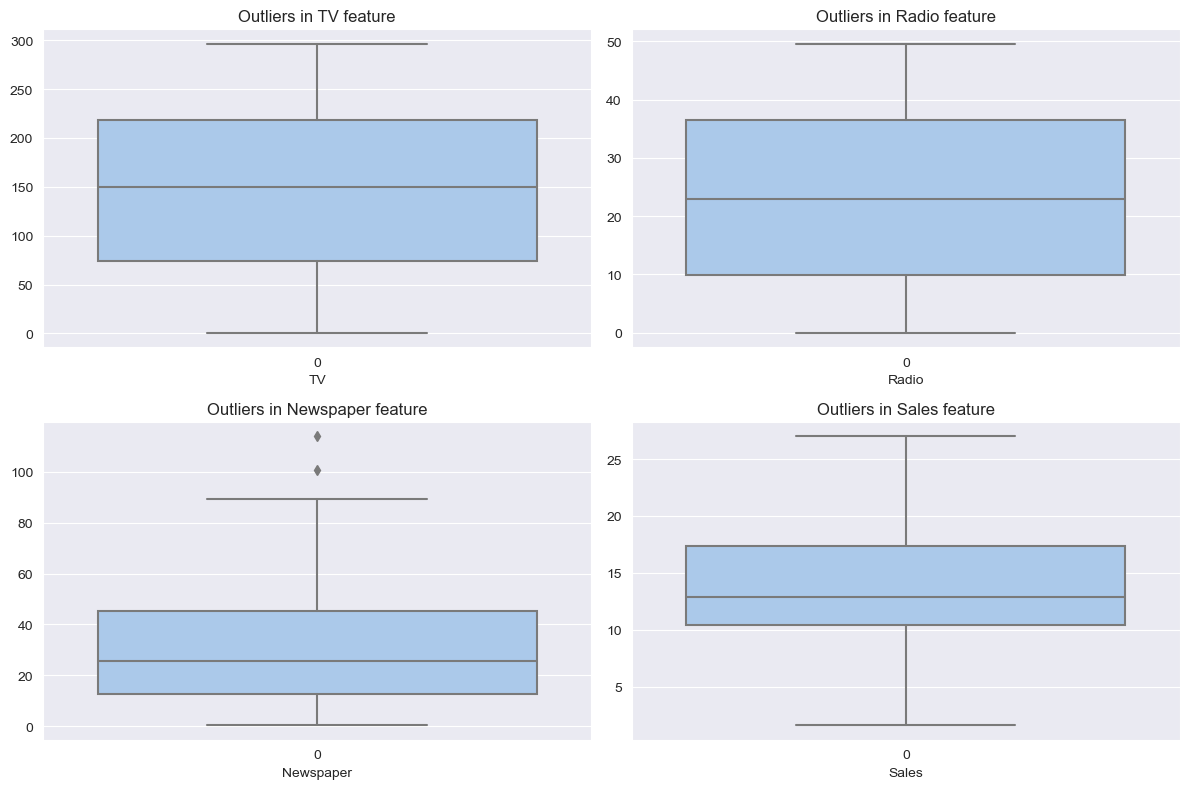

In [15]:
# Boxplot

plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

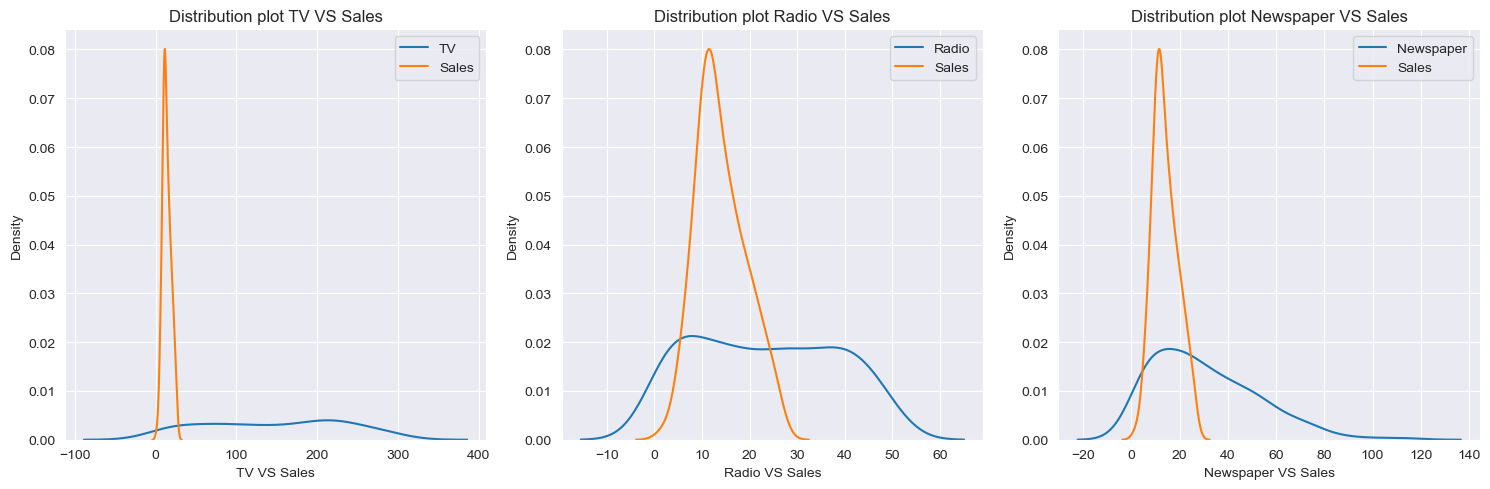

In [16]:
# Distplot(Distribution plot)

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

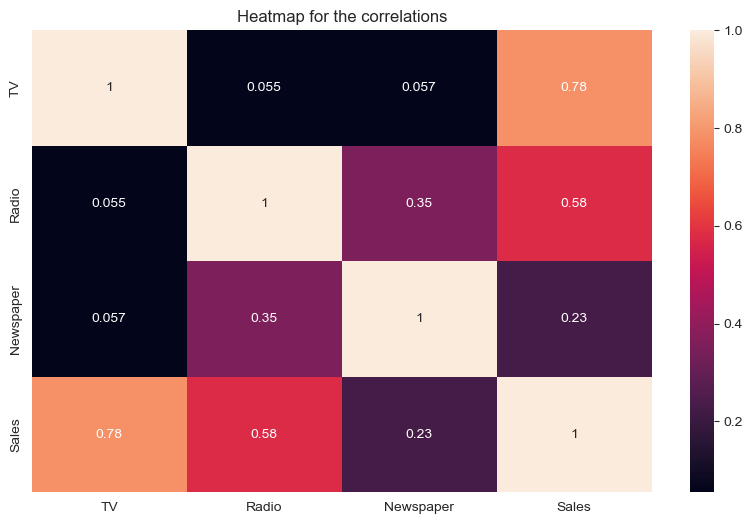

In [18]:
# Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap for the correlations")
plt.show()

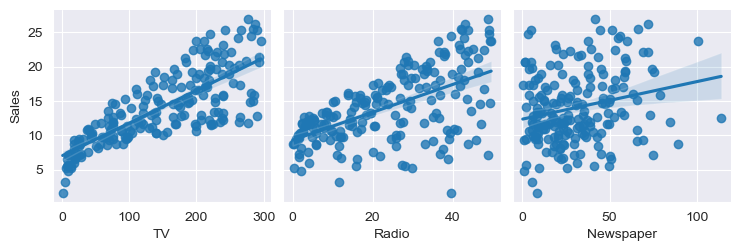

In [19]:
# Pairplot

sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

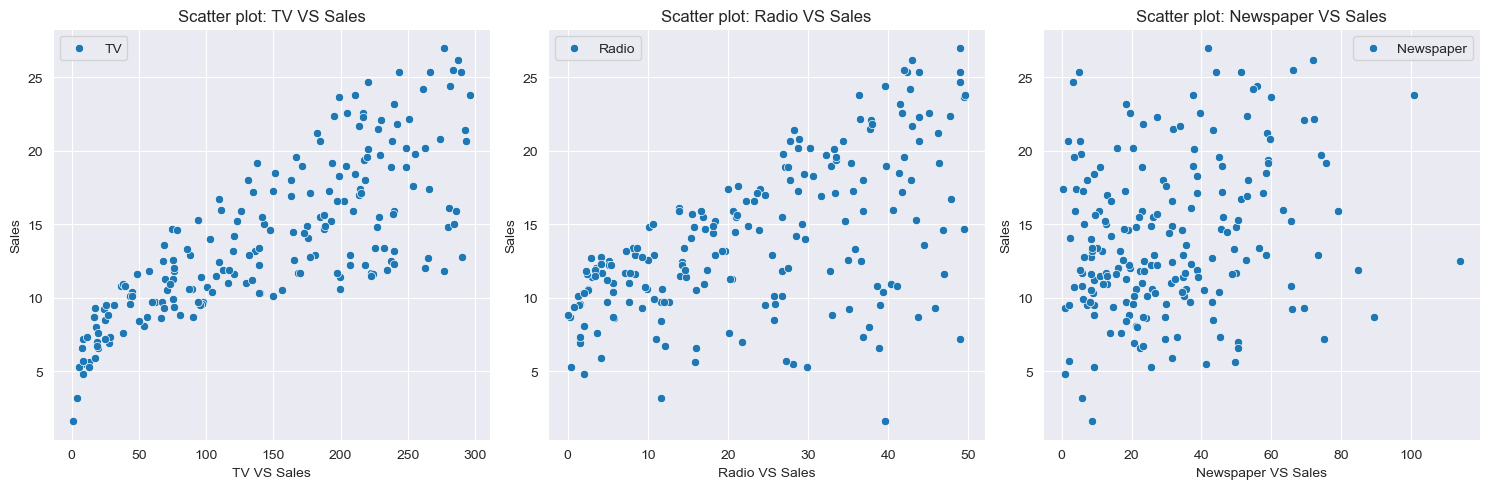

In [20]:
# Scatterplot

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


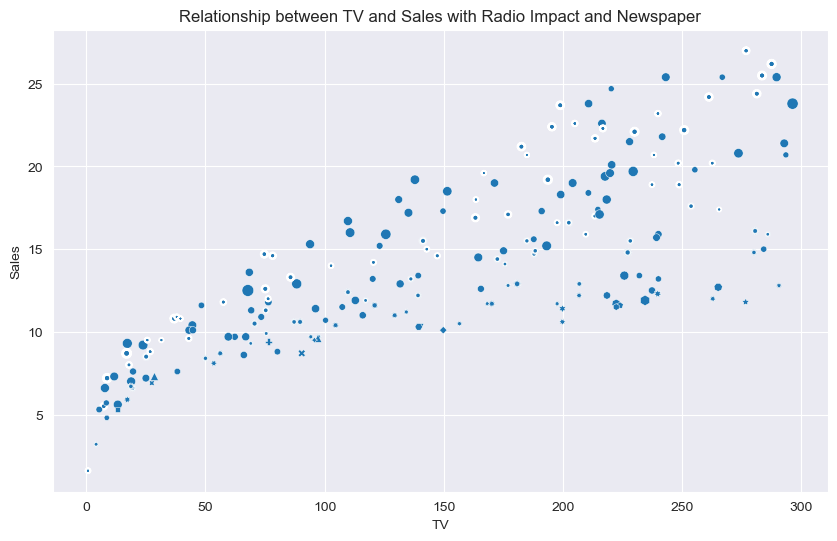

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

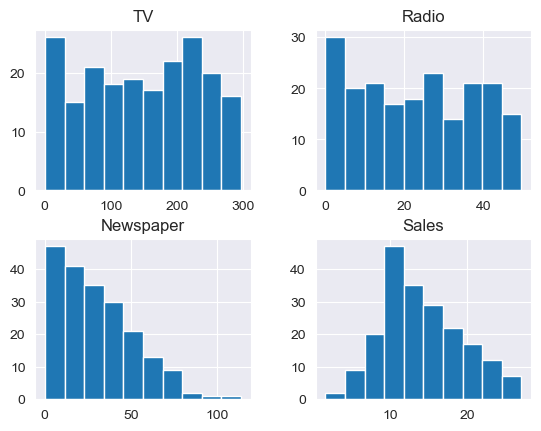

In [22]:
# Histplot

df.hist()
plt.show()

# 5) Models Training & Predictions

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
Y = df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = lr.predict(X_test)

# Evaluate the model 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.9918855518287901
R-squared: 0.8927605914615384


#### DecisionTree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = dtr.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6222500000000002
R-squared: 0.9664992188422714


#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = rfr.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4767088249999998
R-squared: 0.9743348846568374


#### Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = gbr.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.46101570327739194
R-squared: 0.9751797731044238


#### SVM

In [31]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  
model_svm.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = model_svm.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.9079901927515952
R-squared: 0.8972773613524089


In [35]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("SVM Regression", SVR(kernel='linear')),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Decesion Tree Regressor", DecisionTreeRegressor())
]

Linear Regression
Mean Squared Error: 1.9918855518287901
R2 Score: 0.8927605914615384
Cross-Validation R2: 0.8858144199760695


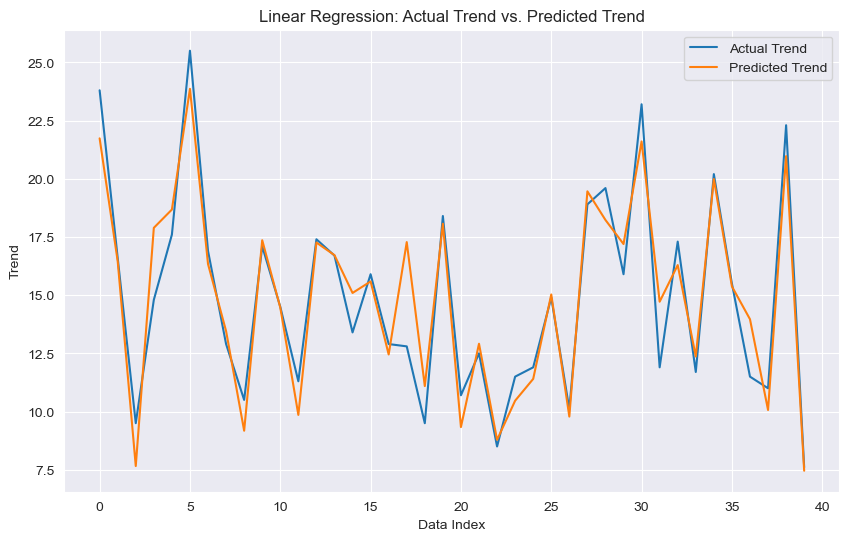


Ridge Regression
Mean Squared Error: 1.991996636141797
R2 Score: 0.8927546108890031
Cross-Validation R2: 0.8858144302215354


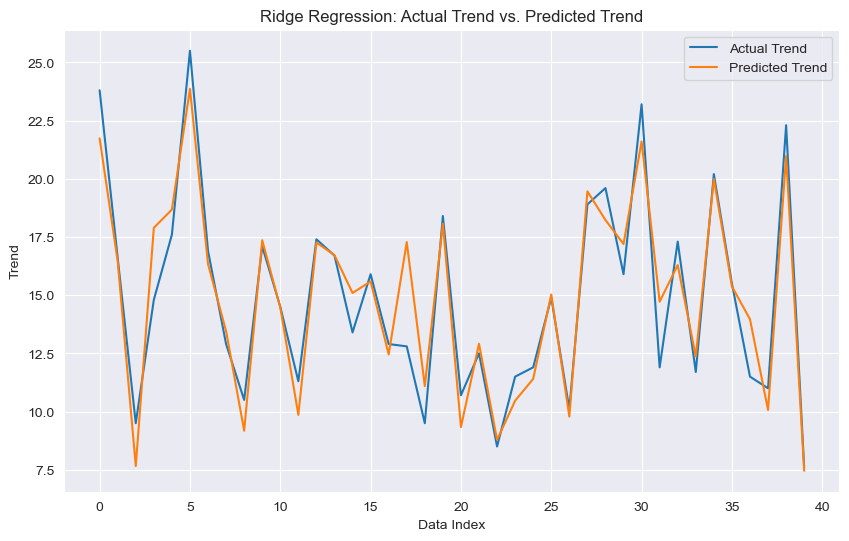


Lasso Regression
Mean Squared Error: 2.0446632851955644
R2 Score: 0.8899191365872575
Cross-Validation R2: 0.8864101072027637


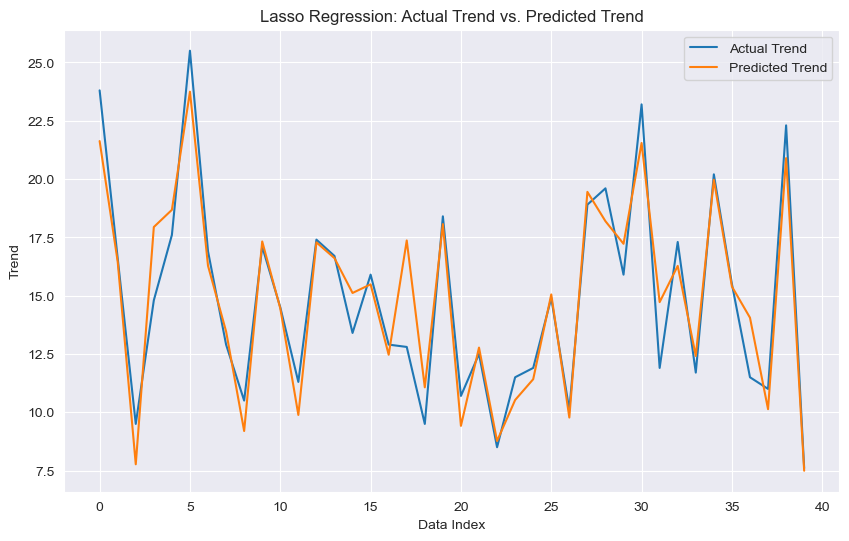


SVM Regression
Mean Squared Error: 1.9079901927515952
R2 Score: 0.8972773613524089
Cross-Validation R2: 0.8794015133160119


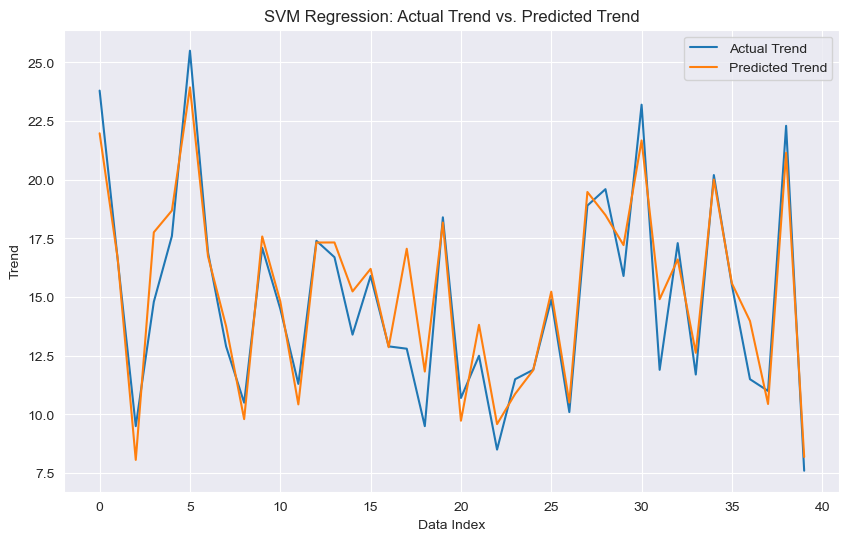


Gradient Boosting Regressor
Mean Squared Error: 0.46102247323535306
R2 Score: 0.9751794086224952
Cross-Validation R2: 0.976050531058263


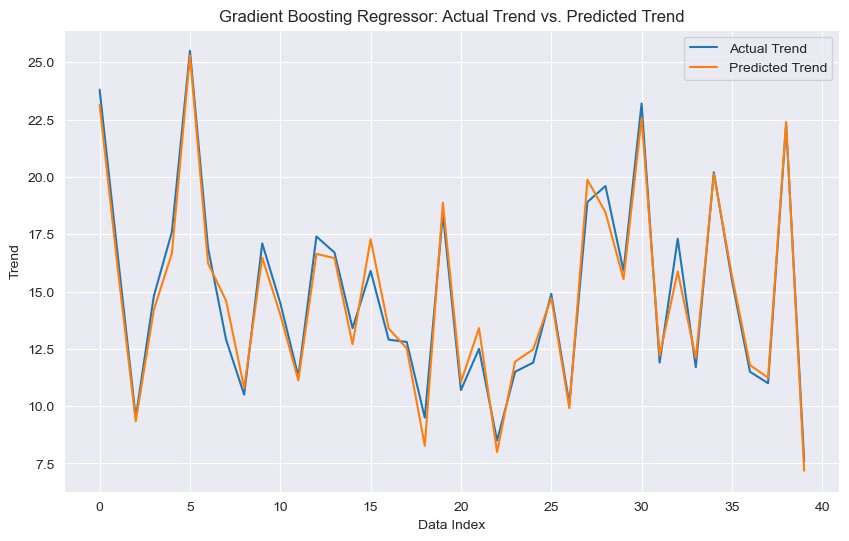


Random Forest Regressor
Mean Squared Error: 0.4842472499999997
R2 Score: 0.9739290298939625
Cross-Validation R2: 0.9729631028674968


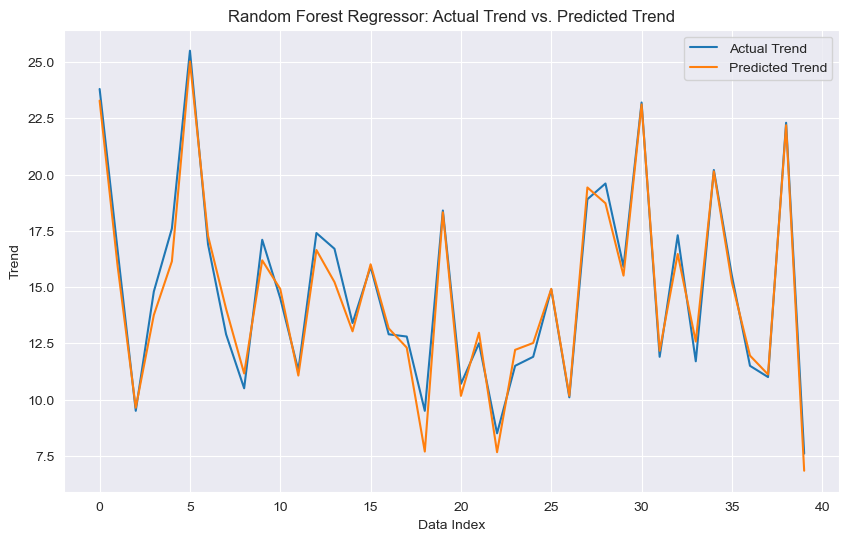


Decesion Tree Regressor
Mean Squared Error: 0.8472500000000004
R2 Score: 0.9543856378692076
Cross-Validation R2: 0.9354024428738388


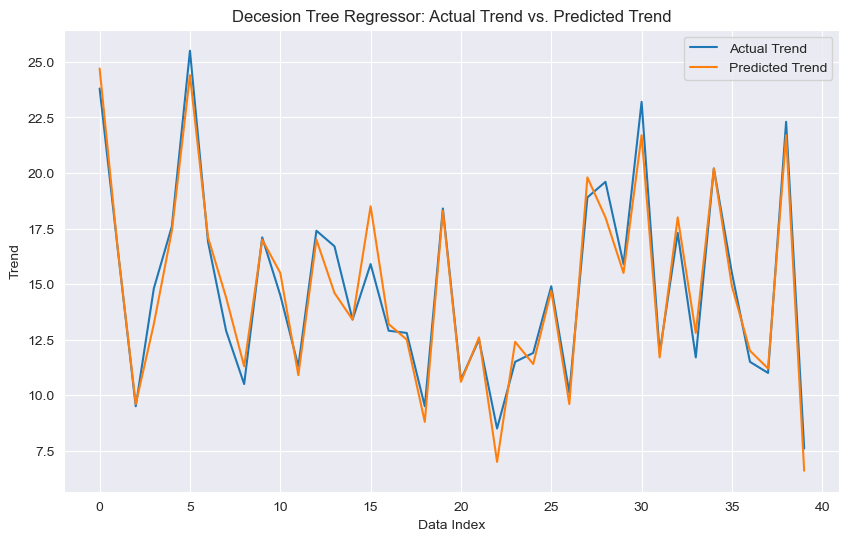

In [36]:
# Lineplot visualisation actual Vs. predicted


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print() 

### Predictions

In [41]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(1)  
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)
# Step 2: Make predictions using the five models
linear_predictions = lr.predict(sample_data)
tree_predictions = dtr.predict(sample_data)
forest_predictions = rfr.predict(sample_data)
gb_predictions = gbr.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)
# Step 3: Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']
predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})
# Print the table
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
6,11.8,11.518455,11.8,11.445,11.459990,12.174452
153,19.0,18.117880,19.0,18.842,19.112503,18.465746
5,7.2,12.240264,7.2,7.155,7.341863,13.251366
31,11.9,11.403032,11.4,12.342,12.476510,11.884994
195,7.6,5.393657,7.6,7.970,7.729460,6.007442


### Conclusions

1) The gradient boosting regressor and random forest regressor are the top-performing models, with high R2 scores and low mean squared errors. These models provide the best predictions for the given dataset.
2) Linear regression, ridge regression, lasso regression, and SVM regression also provide reasonable predictions, but they are outperformed by the ensemble methods.
3) The decision tree regressor, while performing well, is slightly less accurate than the ensemble methods and could be improved with hyperparameter tuning.

In summary, the gradient boosting regressor and random forest regressor are recommended for predicting sales based on advertising expenditure in this dataset, as they provide the most accurate results.